In [133]:
import numpy as np
import matplotlib.pyplot as plt

This notebook contains some tests on the derivative of N1 and information about how to load N1 and N1 derivatives.

In [134]:
N1TT=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttbTT.txt")

In [135]:
len(N1TT[0])

151

In [136]:
#the delta cltts
N1derivatives=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttbTT.txt") 
lprime=N1derivatives[0][1:]
bind=lprime-2
cltt=np.loadtxt('/global/homes/j/jia_qu/so-lenspipe/data/ctt.txt')
dcltt=[]
for i in range(len(bind)):
    dcltt.append(0.002*cltt[2:][int(bind[i])])

a=N1derivatives[1:].transpose()
b=a[1:].transpose()
rec=[]
for i in range(len(b)):
    rec.append(np.sum(b[:,:][i]*dcltt))
rec=np.array(rec)

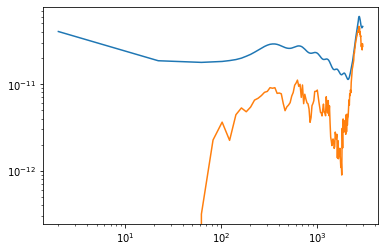

In [146]:
import matplotlib.pyplot as plt
n1bins=np.loadtxt('/global/homes/j/jia_qu/so-lenspipe/data/n1bins.txt')

Np=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/test1.txt") #full 1.001Cltt
Nm=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/test0.txt") #full 0.999Cltt
plt.loglog(n1bins,(Np[:150]-Nm[:150])*(n1bins*(n1bins+1))**2/4)
plt.loglog(n1bins,rec)

In [138]:
len(b)

150

In [139]:
a=N1derivatives[1:].transpose()
b=a[1:].transpose()
rec=[]
for i in range(len(b)):
    rec.append(np.sum(b[:,:][i]*dcltt))
rec=np.array(rec)

## these are the bands used

In [140]:
bins=np.arange(2,2992,20)
bands=20*np.ones(len(bins))
bands[0]=12
bands=bands.astype(int)
len(bands)


150

## The derivative test for cl derivatives

In [141]:
N1derivatives=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttbTT.txt") 
a=N1derivatives[1:].transpose()
b=a[1:].transpose()
rec=[]
for i in range(len(b)):
    rec.append(np.sum(b[:,:][i]*dcltt*bands[i]))
rec=np.array(rec)

## Bumping the raw cltt by 1.001 and 0.999

In [142]:
n1001=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/test1.txt")
n0999=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/test0.txt")

## Bandpowered version pump everything up

Since we are only taking derivatives up to 2992, one shouldnt pump everything up after that

In [143]:
def bandedcls(cl,bands):
    lb=0
    clav=np.zeros(len(cl))
    for i in range(len(bands)):
        clav[lb:bands[i]+lb]=np.sum(cl[lb:bands[i]+lb])/bands[i]
        lb+=bands[i]
    return clav
cls=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/cosmo2017_10K_acc3_lensedCls.dat",unpack=True)

clband=bandedcls(cls[1],bands)
np.savetxt("/global/homes/j/jia_qu/so-lenspipe/data/clband.txt",clband)

n1binned1=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/testav1.txt")
n1binned0=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/testav0.txt")


## Replace the cls by the evaluated values

In [144]:
bins=n1bins.astype(int)
cltt=cls[1]
clpoint=cltt.copy()
lb=0
for i in range(len(bands)):
    clpoint[lb:bands[i]+lb]=cltt[bins[i]]
    lb+=bands[i]
np.savetxt("/global/homes/j/jia_qu/so-lenspipe/data/clpoint.txt",clpoint)
n1p1=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/testp1.txt")
n1p0=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/testp0.txt")

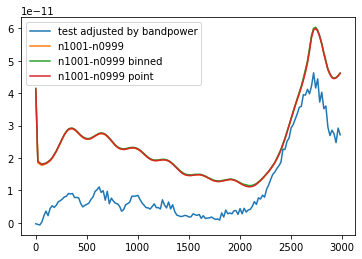

In [149]:
plt.plot(n1bins,rec,label='test adjusted by bandpower')
plt.plot(n1bins,(n1001[:150]-n0999[:150])*(n1bins*(n1bins+1))**2/4,label='n1001-n0999')
plt.plot(n1bins,(n1binned1[:150]-n1binned0[:150])*(n1bins*(n1bins+1))**2/4,label='n1001-n0999 binned')
plt.plot(n1bins,(n1p1[:150]-n1p0[:150])*(n1bins*(n1bins+1))**2/4,label='n1001-n0999 point')

plt.legend()

The above do not matches up, maybe the assumption that the variation between the derivatives from 1 L to the next is not that great.

In [152]:
#How to read N1 derivatives

In [17]:
N1derivatives=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttbTT.txt",unpack=True) 
lprime=N1derivatives[0][1:]

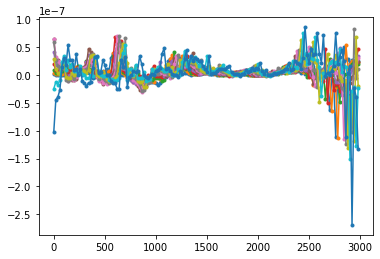

In [18]:
for i in range(100,111):
    plt.plot(n1bins,N1derivatives[i][1:],'.-')

#### 

## Check whether the assumption of having 20 derivatives is the same as having center derivative*20

We are going to perturbe the arrays from $1393<=l<=1412$ and check that this is similar to 10*Cl[1402]

In [54]:
len(np.arange(1393,1413))

20

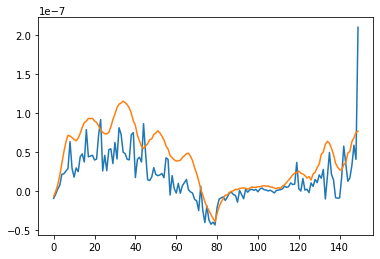

In [58]:
plt.plot(20*n10[10][1:])
plt.plot(a)

In [57]:
n10=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1cltt10pTT.txt",unpack=True)
a=np.zeros(len(n10[10][1:]))
for i in range(1,len(n10)):
    a+=n10[i][1:]


## How to Read the N1derivative file wrt cltt

The following is for taking 150 derivatives. The 0th row and column corresponds to the L where N1 is evaluated and the l' where the derivative is taken.

In [125]:
N1derivatives=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttbTT.txt",unpack=True) #sampled over 150 points
n1tttt=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clttTT.txt",unpack=True) #sampled over 40 points
n1tett=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clteTT.txt",unpack=True) #sampled over 40 points
n1teee=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clteEE.txt",unpack=True) #sampled over 40 points
n1tete=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1clteTE.txt",unpack=True) #sampled over 40 points
#need ebeb
#need tbtb

In [115]:
n1tete

array([[ 0.00000000e+00,  2.00000000e+00,  2.20000000e+01, ...,
         2.94200000e+03,  2.96200000e+03,  2.98200000e+03],
       [ 2.00000000e+00, -4.71161166e-20, -1.47426320e-19, ...,
         1.52053901e-11,  1.12500401e-11,  6.94443292e-12],
       [ 1.20000000e+01, -1.12914449e-19,  3.26765994e-20, ...,
         3.34812167e-11,  3.18413975e-11,  2.07358290e-11],
       ...,
       [ 2.35200000e+03, -3.23917082e-08, -4.07883037e-09, ...,
         1.16949027e-06,  1.12215028e-06,  2.65010434e-07],
       [ 2.65200000e+03, -9.74061514e-09, -1.29334467e-09, ...,
         1.51149536e-06,  1.19458127e-06,  3.08796350e-06],
       [ 2.95200000e+03,  5.59208853e-10,  1.24579376e-10, ...,
        -2.64160877e-09, -2.58513439e-09, -1.02805555e-08]])

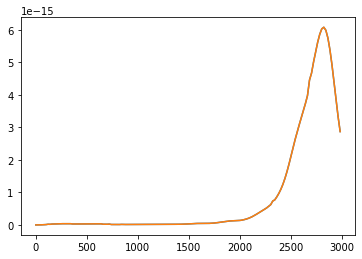

In [110]:
plt.plot(n1bins,N1derivatives[1][1:])
plt.plot(n1bins,n1tt40[1][1:])


## ${Cl}^{\phi\phi}$ derivative and test

The N0 used for the input consists of an array of deflection fields, if using symlems need to divide by $L^2$. The fortran code requires $C_l^{BB}$ by default. We just set it as an array of 1s with the same length of the other $Cls$

In [62]:
#load the norms as a whole array from l=2 to lmax deflection fields.
norms=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/norm_lmin_300_lmax_3000.txt")
bins=norms[2:,0]
ntt=norms[2:,1]
nee=norms[2:,2]
neb=norms[2:,3]
nte=norms[2:,4]
ntb=norms[2:,5]
nbb=np.ones(len(ntb))
norms=np.array([ntt/bins**2,nee/bins**2,neb/bins**2,nte/bins**2,ntb/bins**2,nbb])

How to read the clphiphi derivatives

In [124]:
n1der=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1der",unpack=True)
n1ttttder=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/N1_TTTT_analytical_matrix.dat",unpack=True)
n1eeeeder=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/N1_EEEE_analytical_matrix.dat",unpack=True)
n1ebebder=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/N1_EBEB_analytical_matrix.dat",unpack=True)
n1teteder=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/N1_TETE_analytical_matrix.dat",unpack=True)
n1tbtbder=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/N1_TBTB_analytical_matrix.dat",unpack=True)

#The first row gives the lprimes that derivatives take place
lprime=n1der[0][1:]
#The first column are the Ls of N1(L)
L=n1der[1:,0]
#Hence column ith will correspond to the derivative of N1 at the corresponding value of l'
#i.e the derivative about lprime=2 is then
n1der[1:,1]

array([8.67449e-06, 3.93683e-06, 3.58763e-06, 3.24394e-06, 2.85963e-06,
       2.44767e-06, 2.07749e-06, 1.71489e-06, 1.44404e-06, 1.27651e-06,
       1.20984e-06, 1.28529e-06, 1.45540e-06, 1.70836e-06, 2.00782e-06,
       2.30507e-06, 2.54535e-06, 2.71436e-06, 2.76501e-06, 2.69084e-06,
       2.53866e-06, 2.35475e-06, 2.10980e-06, 1.90642e-06, 1.71920e-06,
       1.64478e-06, 1.65330e-06, 1.73220e-06, 1.88791e-06, 2.10736e-06,
       2.33340e-06, 2.53843e-06, 2.66202e-06, 2.73597e-06, 2.73994e-06,
       2.63398e-06, 2.48957e-06, 2.29533e-06, 2.09745e-06, 1.91211e-06,
       1.76935e-06, 1.70469e-06, 1.70240e-06, 1.75727e-06, 1.87586e-06,
       2.03800e-06, 2.17574e-06, 2.28080e-06, 2.37956e-06, 2.41662e-06,
       2.35791e-06, 2.27913e-06, 2.14456e-06, 1.95194e-06, 1.80134e-06,
       1.68603e-06, 1.60892e-06, 1.56328e-06, 1.59663e-06, 1.71107e-06,
       1.82726e-06, 1.94897e-06, 2.08587e-06, 2.20013e-06, 2.25235e-06,
       2.26524e-06, 2.19302e-06, 2.10310e-06, 1.94570e-06, 1.786

In [71]:
n1=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1nobb") #load N1
bins=np.arange(2,2992,20)
#test n1cltt derivative as array
#derivatives clpp
clkk=np.loadtxt('/global/homes/j/jia_qu/so-lenspipe/data/clkk.txt')
n1der=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n1der")
N1_TT_dtt=n1der.transpose()
bind=N1_TT_dtt[0][:][1:] 
clkk_s=[]
for i in range(len(bind)):
    clkk_s.append(clkk[int(bind[i])])
clkk_s=np.array(clkk_s)
deltan1tt=[]
for i in range(N1_TT_dtt.shape[0]-1):
    
    r=(N1_TT_dtt[i+1][:][1:])

    deltan1tt.append(np.sum(clkk_s*r))

This is a test that $N_1(L)=\sum_{l^\prime}\frac{dN_1(L)}{dC^{\phi\phi}_{l^\prime}}C^{\phi\phi}_{l^\prime}$

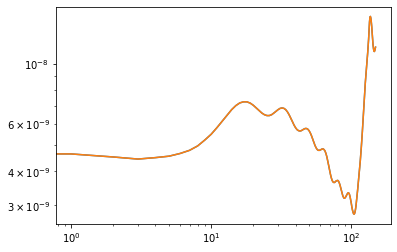

In [72]:
plt.loglog(deltan1tt)
plt.loglog(n1*(bins*(bins+1))**2*0.25)

## Load N0 derivatives

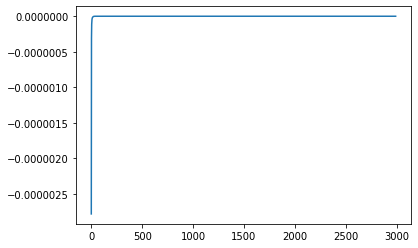

In [166]:
n0der=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/n0TT_cltt.txt")
plt.plot(n0der[29][1:])